# 线性回归模型

## 回归算法概述

回归算法：

回归（Regression）是一类用于预测连续数值的机器学习算法。

比如预测房价、温度、销量、收入等。


回归算法的核心思想
- 找到 **输入特征（X）** 与 **输出数值（Y）** 之间的关系
- 用一个数学模型来 **拟合** 这种关系
- 让模型能够对未来或未知数据进行 **数值预测**


常见的回归算法类型
| 回归类型 | 简要说明 | 典型应用 | 
|-|-|-|
| 线性回归（Linear Regression） | 用一条直线拟合数据 | 房价预测、趋势分析 | 
| 多项式回归（Polynomial Regression） | 用曲线拟合数据 | 非线性关系建模 | 
| 岭回归 / Lasso 回归 | 在线性回归基础上加入正则化，防止过拟合 | 高维数据预测 | 
| 逻辑回归（Logistic Regression） | 虽然叫回归，但用于分类 | 二分类问题 | 
| 决策树回归（Decision Tree Regression） | 用树结构预测数值 | 非线性、复杂关系 | 
| 随机森林回归（Random Forest Regression） | 多棵树投票平均 | 稳定、准确的预测 | 
| XGBoost / LightGBM 回归 | 强大的集成学习方法 | Kaggle 竞赛常用 | 

回归算法的典型流程
- 收集数据
- 选择特征（Feature Engineering）
- 选择回归模型
- 训练模型（Fit）
- 评估模型（MSE、RMSE、R² 等）
- 使用模型进行预测





什么是“拟合”（Fitting）

拟合就是让模型尽可能贴合训练数据的过程。

你可以把它想象成：

给你一堆散点（数据），你要画一条线或一条曲线，让它尽量“贴着”这些点走。
- 拟合得好：模型既能解释已有数据，也能预测新数据
- 拟合得差：模型无法捕捉数据规律，预测不准

拟合的目标：找到数据背后的真实规律，而不是死记硬背数据本身。


什么是“过拟合”（Overfitting）

过拟合就是模型把训练数据“记得太死”，以至于无法泛化到新数据。

换句话说：

模型不仅学到了规律，还把噪声、偶然性、错误点也当成规律学了进去。

结果就是：
- 在训练集上表现非常好（几乎完美）
- 在测试集或新数据上表现很差

过拟合 = 学得太“细”，失去了泛化能力


| 情况                 | 特点                             | 结果                              |
|----------------------|----------------------------------|-----------------------------------|
| 欠拟合（Underfitting） | 模型太简单，学不到规律           | 训练集和测试集都表现差            |
| 良好拟合（Good Fit）   | 模型刚好，学到真实规律           | 训练集好，测试集也好              |
| 过拟合（Overfitting） | 模型太复杂，把噪声也学了进去     | 训练集表现很好，测试集表现很差    |

## 线性回归

线性回归是什么？

**线性回归（Linear Regression）** 是用“直线（或超平面）”去拟合数据、做数值预测的模型。
- 输入： 特征 x（可以是一个，也可以是多个）
- 输出： 连续数值 y（房价、销量、成绩等）
- 目标： 找到一组参数，让

    $ \hat {y}=w_1x_1+w_2x_2+\dots +w_Dx_D+b $

- 尽可能接近真实值 y。

当只有一个特征 x 时，就是一条直线：$ \hat {y}=wx+b $

线性回归的基本思想

线性回归的核心思想是：用线性函数近似输入与输出之间的关系，通过最小化误差来求出最优参数。

- 预测值：

    $ \hat {{y}^{(i)}} = w_1 x_1^{(i)} + \dots + w_D x_D^{(i)} + b $


- 残差（误差）：$ e^{(i)} = y^{(i)} - \hat {{y}^{(i)}} $
- 目标：让所有样本的误差整体最小

| 元素           | 含义                           | 常见形式/例子                                             |
|----------------|--------------------------------|------------------------------------------------------------|
| 模型形式       | 用线性函数做预测               | $ \hat{y} = w_1 x_1 + \dots + w_D x_D + b$               |
| 目标           | 让预测值尽量接近真实值         | 最小化损失函数 $ J(w,b) $                                |
| 损失函数       | 衡量整体预测误差               | 均方误差 MSE：$ \frac{1}{n}\sum (y^{(i)}-\hat{y}^{(i)})^2 $|
| 解析解（正规方程） | 一次计算出最优参数           | $ \mathbf{w}^* = (X^T X)^{-1} X^T \mathbf{y} $            |
| 迭代解（梯度下降） | 通过多次更新逼近最优解       | $ w := w - \alpha \frac{\partial J}{\partial w} $ 等       |
| 参数           | 斜率和截距（或权重和偏置）     | 一元：$ w, b $；多元：$ \mathbf{w}, b $                    |

线性回归的假设、优点和局限

1. 常见假设
- 特征与目标之间近似线性关系  
- 误差具有相同方差（同方差性）  
- 误差独立  
- 误差近似正态分布  

2. 优点
- 简单、可解释性强  
- 训练速度快  
- 作为 baseline 模型非常好用  

3. 局限
- 难以表达复杂非线性关系  
- 对异常值敏感  
- 多重共线性会导致参数不稳定  


| 类别 | 回归算法 | sklearn 对应类 | 说明 |
|------|-----------|----------------|------|
| 线性模型 | 普通最小二乘回归 | LinearRegression | 最基础的线性回归模型 |
| 线性模型 | 岭回归 | Ridge | L2 正则化，防止过拟合 |
| 线性模型 | Lasso 回归 | Lasso | L1 正则化，可做特征选择 |
| 线性模型 | ElasticNet | ElasticNet | L1 + L2 混合正则化 |
| 线性模型 | Bayesian Ridge | BayesianRidge | 贝叶斯线性回归 |
| 线性模型 | SGD 回归 | SGDRegressor | 使用随机梯度下降求解 |
| 线性模型 | Quantile Regression | QuantileRegressor | 分位数回归 |
| 核方法 | Kernel Ridge Regression | KernelRidge | 核技巧 + 岭回归 |
| 支持向量机 | 支持向量回归 | SVR | 适合非线性关系 |
| 邻近方法 | KNN 回归 | KNeighborsRegressor | 基于最近邻的回归 |
| 决策树 | 决策树回归 | DecisionTreeRegressor | 基于树结构的非线性回归 |
| 集成学习 | 随机森林回归 | RandomForestRegressor | 多棵树平均，稳定性强 |
| 集成学习 | 梯度提升回归 | GradientBoostingRegressor | Boosting 方法，效果好 |
| 集成学习 | AdaBoost 回归 | AdaBoostRegressor | 自适应提升方法 |
| 集成学习 | Extra Trees 回归 | ExtraTreesRegressor | 极端随机树，速度快 |
| 高斯过程 | 高斯过程回归 | GaussianProcessRegressor | 基于概率模型的回归 |
| 交叉分解 | PLS 回归 | PLSRegression | 偏最小二乘回归 |

# 使用sklearn库训练线性回归模型

使用 sklearn 做线性回归一般分 4 步：
- 准备数据（X, y）
- 划分训练集和测试集
- 建立并训练模型
- 使用模型进行预测


LinearRegression() 是什么？

LinearRegression 是 sklearn 中最基础的 普通最小二乘回归（Ordinary Least Squares） 模型，用来拟合线性关系：

$ \hat {y}=w_0+w_1x_1+\dots +w_px_p $

它通过最小化残差平方和来求解参数


LinearRegression 构造参数（Parameters）
| 参数名           | 默认值 | 说明 |
|------------------|--------|------|
| fit_intercept    | True   | 是否计算截距项 b；若为 False，要求数据已中心化 |
| copy_X           | True   | 是否复制 X；False 时可能在训练过程中修改原数据 |
| n_jobs           | None   | 并行计算数量（仅在多目标或稀疏矩阵时有效） |
| positive         | False  | 是否强制系数为正（非负最小二乘） |
| tol              | 1e-6   | lsqr 求解器的收敛精度（仅稀疏矩阵时有效） |

LinearRegression 属性（Attributes）
| 属性名               | 说明 |
|----------------------|------|
| coef_                | 回归系数向量（权重），形状为 (n_features,) |
| intercept_           | 截距项 b |
| rank_                | 设计矩阵 X 的秩（仅 dense 数据可用） |
| singular_            | X 的奇异值（仅 dense 数据可用） |
| n_features_in_       | 训练时看到的特征数量 |
| feature_names_in_    | 特征名称（如果输入数据带列名） |

LInearRegression()的方法
1.fit(X,y)

用来训练模型，计算coef_和intercept_

```
model.fit(X, y)
```

2.predict(X)

使用训练好的模型对数据进行预测

```
y_pred = model.predict(X_test)
```

3.score(X,y)

用来评估模型，返回R^2的值

```
model.score(X_test, y_test)
```

4.coef_

返回模型系数

```
model.coef_
```

5.intercept_

返回模型截距

```
model.intercept_
```

6.get_params()

返回模型参数

```
model.get_params()
```
7.set_params()

设置模型参数

```
model.set_params(alpha=0.1)
```


In [12]:
# 导入库与数据集
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

In [ ]:
# 加载 sklearn 自带的数据集

data = fetch_california_housing()
X = data.data      # 特征矩阵
y = data.target    # 回归目标

HTTPError: HTTP Error 403: Forbidden

In [13]:
df = pd.read_csv('house_data.csv')

# 特征值（去掉目标列 'MEDV'）
X = df.drop(columns='MEDV')

# 目标变量
y = df['MEDV']




In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
print("权重（coef_）:", model.coef_)
print("截距（intercept_）:", model.intercept_)

权重（coef_）: [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
截距（intercept_）: 30.24675099392366


In [17]:
y_pred = model.predict(X_test)
print("预测结果:", y_pred[:10])  # 打印前10个预测值

预测结果: [28.99672362 36.02556534 14.81694405 25.03197915 18.76987992 23.25442929
 17.66253818 14.34119    23.01320703 20.63245597]


In [18]:
score = model.score(X_test, y_test)
print("R² 分数:", score)

R² 分数: 0.6687594935356326


In [19]:
import matplotlib.pyplot as plt

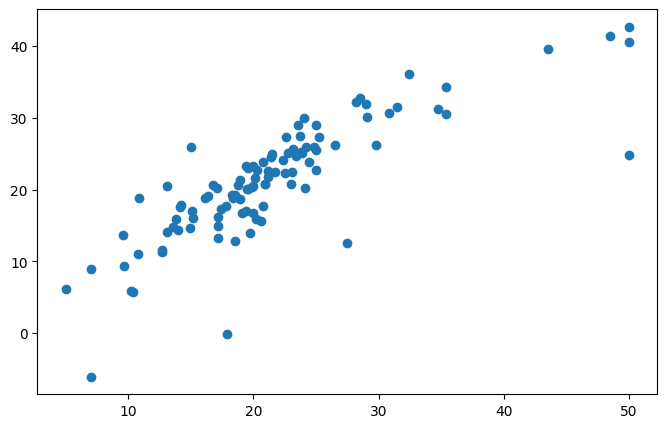

In [24]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, label="Train")

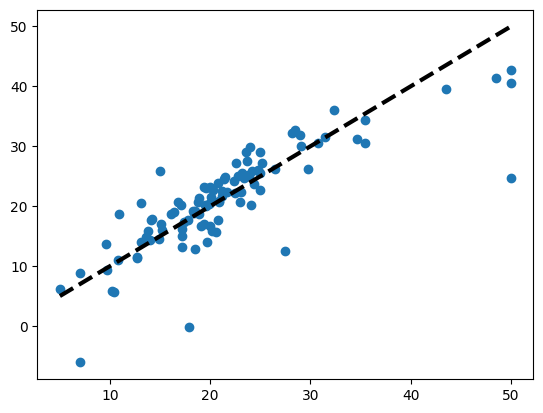

In [23]:
plt.scatter(y_test, y_pred, label="y_all")
plt.plot([y.min(), y.max()],
        [y.min(), y.max()],
        'k--',
        lw=3,
        label="all_predict"
        )


plt.show()